In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def load_data():
    data = pd.read_excel('dataset_kotor.xlsx')
    return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df


,no,description,label
0,1.0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,negatif
1,2.0,Abahboss ni mula dah balik share dakyah2 pro t...,negatif
2,3.0,"Abis dapet jdwal vaksin dosis 3, terus baca ba...",negatif
3,4.0,@Boediantar4 abis di vaksin sinovac asal china...,negatif
4,5.0,@agussari AC katanya. Kalau mau pake AC harus ...,negatif
...,...,...,...
5872,5873.0,Kebijakan vaksinasi untuk ibu hamil baru dikel...,netral
5873,5874.0,;dan pengalaman dalam tanggap darurat sekala b...,netral
5874,5875.0,Kabar terbaru: Kementerian Kesehatan mengizin...,netral
5875,5876.0,ð_x009d__x0090_‚ð_x009d__x0090_šð_x009d__x0090...,netral


In [ ]:
df = pd.DataFrame(tweet_df[['description']])

In [ ]:
df.head()

,description
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...
1,Abahboss ni mula dah balik share dakyah2 pro t...
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba..."
3,@Boediantar4 abis di vaksin sinovac asal china...
4,@agussari AC katanya. Kalau mau pake AC harus ...


In [ ]:
#Mengubah text menjadi lowercase
df['lower'] = df['description'].str.lower()

In [ ]:
df.head()

,description,lower
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...
1,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba..."
3,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...
4,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...


In [ ]:
import re # impor modul regular expression
def hapus_angka(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    return tweet

In [ ]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [ ]:
df.head()

,description,lower,h_angka
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...
1,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac..."
3,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...
4,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.8 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#import stopword
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

In [ ]:
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)


def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, 
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean


In [ ]:
df['token'] = df['h_angka'].apply(lambda x: clean_tweets(x))

In [ ]:
df.head()

,description,lower,h_angka,token
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit..."
1,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...,"[abahboss, ni, dah, share, dakyah, pro, teori,..."
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac...","[abis, dapet, jdwal, vaksin, dosis, baca, baca..."
3,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...,"[abis, vaksin, sinovac, china, warga, yg, ting..."
4,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...,"[ac, pake, ac, bayar, antigen, pcr, ac, loh, ,..."


In [ ]:
#remove punct

def remove_punct(text):

    text = " ".join([char for char in text if char not in string.punctuation])

    return text

#simpan di kolom tabel baru tweet

df['fulltext'] = df['token'].apply(lambda x: remove_punct(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer().fit(df['fulltext'])

bow_transformer.vocabulary_

{'aamiin': 9,
 'maaf': 5851,
 'utk': 10909,
 'depan': 2152,
 'tolong': 10524,
 'pikir': 7917,
 'kritis': 5324,
 'covid': 1914,
 'vaksin': 10949,
 'ajar': 188,
 'suka': 9858,
 'klu': 5062,
 'yg': 11437,
 'takut': 10044,
 'peluang': 7729,
 'jahat': 4196,
 'manusia': 6027,
 'satu': 8983,
 'lawan': 5594,
 'gak': 3082,
 'abahboss': 17,
 'ni': 7057,
 'dah': 2001,
 'share': 9357,
 'dakyah': 2014,
 'pro': 8227,
 'teori': 10253,
 'konspirasi': 5199,
 'anti': 448,
 'akaun': 207,
 'ig': 3859,
 'kena': 4831,
 'banned': 866,
 'kali': 4559,
 'pasal': 7628,
 'benda': 1034,
 'serik': 9289,
 'abis': 28,
 'dapet': 2043,
 'jdwal': 4292,
 'dosis': 2543,
 'baca': 748,
 'testi': 10324,
 'temen': 10216,
 'udah': 10754,
 'kipi': 4991,
 'nya': 7191,
 'rem': 8607,
 'bangettt': 845,
 'sinovac': 9487,
 'china': 1752,
 'warga': 11190,
 'tinggal': 10431,
 'dunia': 2636,
 'lumpuh': 5830,
 'mata': 6107,
 'buta': 1580,
 'si': 9384,
 'jokowi': 4409,
 'tuh': 10655,
 'ajak': 181,
 'kerumun': 4901,
 'sembako': 9172,
 'ac'

In [ ]:
text_bow = bow_transformer.transform(df['fulltext'])

print(text_bow)

  (0, 9)	1
  (0, 188)	1
  (0, 1914)	1
  (0, 2152)	1
  (0, 3082)	1
  (0, 4196)	1
  (0, 5062)	1
  (0, 5324)	1
  (0, 5594)	2
  (0, 5851)	1
  (0, 6027)	1
  (0, 7729)	1
  (0, 7917)	1
  (0, 8983)	1
  (0, 9858)	2
  (0, 10044)	1
  (0, 10524)	1
  (0, 10909)	1
  (0, 10949)	2
  (0, 11437)	1
  (1, 17)	1
  (1, 207)	1
  (1, 448)	1
  (1, 866)	1
  (1, 1034)	1
  :	:
  (5875, 10955)	3
  (5875, 11353)	5
  (5875, 11437)	1
  (5876, 40)	1
  (5876, 1213)	2
  (5876, 1358)	1
  (5876, 1929)	1
  (5876, 2016)	1
  (5876, 2742)	1
  (5876, 2941)	1
  (5876, 3487)	1
  (5876, 4101)	1
  (5876, 4659)	1
  (5876, 4794)	1
  (5876, 4832)	1
  (5876, 5002)	1
  (5876, 6092)	1
  (5876, 8620)	1
  (5876, 9134)	1
  (5876, 9390)	1
  (5876, 10280)	1
  (5876, 10813)	2
  (5876, 10833)	1
  (5876, 10909)	1
  (5876, 10955)	1


In [ ]:
X = text_bow.toarray()

print(X)

X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5877, 11514)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(text_bow)

print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)

print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 11437)	0.0858245973404881
  (0, 10949)	0.10086662026761012
  (0, 10909)	0.1595772882163753
  (0, 10524)	0.18956978470147925
  (0, 10044)	0.16036635292859333
  (0, 9858)	0.42773722331083447
  (0, 8983)	0.20122335860754548
  (0, 7917)	0.20450123010108695
  (0, 7729)	0.2713315403220729
  (0, 6027)	0.19048531499301152
  (0, 5851)	0.20122335860754548
  (0, 5594)	0.36748932677083107
  (0, 5324)	0.2671262472046585
  (0, 5062)	0.2207370048125984
  (0, 4196)	0.2488878695991683
  (0, 3082)	0.13482935188140313
  (0, 2152)	0.22660323577629274
  (0, 1914)	0.0765562553088117
  (0, 188)	0.18780627934707853
  (0, 9)	0.22790169614349307
  (1, 10949)	0.046852330433050544
  (1, 10253)	0.17918696403806614
  (1, 9357)	0.22516841905761328
  (1, 9289)	0.29804730099219207
  (1, 8227)	0.22706428411245422
  :	:
  (5875, 1996)	0.11216454784802325
  (5875, 1213)	0.1409490851861817
  (5875, 230)	0.1656636775044951
  (5876, 10955)	0.06263742761302822
  (5876, 10909)	0.13254644116772585
  (5

In [ ]:
df.head()

,description,lower,h_angka,token,fulltext
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit...",aamiin maaf utk depan tolong pikir kritis covi...
1,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...,"[abahboss, ni, dah, share, dakyah, pro, teori,...",abahboss ni dah share dakyah pro teori konspir...
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac...","[abis, dapet, jdwal, vaksin, dosis, baca, baca...",abis dapet jdwal vaksin dosis baca baca testi ...
3,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...,"[abis, vaksin, sinovac, china, warga, yg, ting...",abis vaksin sinovac china warga yg tinggal dun...
4,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...,"[ac, pake, ac, bayar, antigen, pcr, ac, loh, ,...",ac pake ac bayar antigen pcr ac loh pasar raky...


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, tweet_df.label, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)

predict= pd.Series(prediction)

print(predict.to_string())

0        netral
1       positif
2       negatif
3       positif
4       negatif
5       negatif
6        netral
7       positif
8       negatif
9        netral
10       netral
11       netral
12      negatif
13      negatif
14      negatif
15      positif
16      positif
17      negatif
18       netral
19      negatif
20      positif
21       netral
22       netral
23      negatif
24       netral
25      positif
26      positif
27      negatif
28      negatif
29      positif
30      negatif
31      positif
32      negatif
33      negatif
34      positif
35      positif
36       netral
37      positif
38      positif
39       netral
40      negatif
41      positif
42      negatif
43      negatif
44      negatif
45       netral
46      positif
47      negatif
48       netral
49      negatif
50       netral
51      negatif
52      positif
53       netral
54       netral
55      negatif
56       netral
57      positif
58      positif
59       netral
60      negatif
61      negatif
62      

In [ ]:
true_label= pd.Series(y_test)

print(true_label.to_string())

2511     netral
4045    positif
744     negatif
5487    positif
1613    negatif
122     negatif
2908     netral
4486    positif
2114     netral
3026     netral
2356     netral
2467     netral
286     negatif
1835    negatif
1042    negatif
3001     netral
4689    positif
63      negatif
3407     netral
202     negatif
4691    positif
3454     netral
1951     netral
81      negatif
2201     netral
237     negatif
4807    positif
218     negatif
1107    negatif
3877    positif
361     negatif
4968    positif
879     negatif
2559     netral
1682    negatif
3738    positif
3441     netral
2640     netral
2829     netral
2459     netral
4620    positif
4191    positif
650     negatif
5175    positif
1518    negatif
2861     netral
3950    positif
652     negatif
3216     netral
614     negatif
2331     netral
1095    negatif
3762    positif
2208     netral
2937     netral
209     negatif
3505     netral
4764    positif
4041    positif
3409     netral
1644    negatif
42      negatif
5497    

test time: 0.047s
accuracy: 0.820


In [ ]:
from time import time

from sklearn import metrics

import matplotlib.pyplot as plt

import seaborn as sn

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from pandas import DataFrame

t = time()

y_pred = model.predict(x_test)

test_time = time() - t

print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)

print("accuracy: %0.3f" % score1)

test time: 0.068s
accuracy: 0.820


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

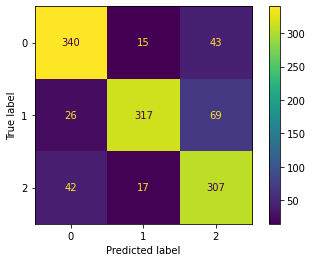

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.83      0.85      0.84       398
      netral       0.91      0.77      0.83       412
     positif       0.73      0.84      0.78       366

    accuracy                           0.82      1176
   macro avg       0.82      0.82      0.82      1176
weighted avg       0.83      0.82      0.82      1176



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:

print(scores)

# Print the mean accuracy of all 10 folds

print(scores.mean())

[0.76008493 0.82553191 0.8212766  0.83191489 0.83617021 0.83617021
 0.81489362 0.75744681 0.80851064 0.8106383 ]
0.8102638117179384


In [ ]:
def load_data():
  data = pd.read_excel('contoh_bersih.xlsx')
  return data

In [ ]:
cobahari = load_data()
df = pd.DataFrame(cobahari[['tweet_clean']])
df.head()

,tweet_clean
0,patut syukur indonesia salah baik dian vaksin ...
1,alhamdulilahi rabbil alamin moga vaksinasi lan...
2,cerita ajar riau vaksinasi covid gelar bin jar...
3,dinas sehat dki jakarta antre fasilitas sehat ...
4,tolak vaksin denda juta vaksin nyata bisnis ju...


In [ ]:
dokumen = df['tweet_clean']

In [ ]:
print(dokumen)

0    patut syukur indonesia salah baik dian vaksin ...
1    alhamdulilahi rabbil alamin moga vaksinasi lan...
2    cerita ajar riau vaksinasi covid gelar bin jar...
3    dinas sehat dki jakarta antre fasilitas sehat ...
4    tolak vaksin denda juta vaksin nyata bisnis ju...
5        dah ngebet jual vaksin makmur sejahtera kroni
Name: tweet_clean, dtype: object


In [ ]:
test_1_unseen =  bow_transformer.transform(dokumen)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

diubah menjadi array: 
  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

['positif' 'positif' 'netral' 'netral' 'negatif' 'negatif']


In [ ]:
df['label_model'] = prediction_unseen

df.to_excel('./contoh_hasilprediksi.xlsx',encoding='utf8', index=True)

In [ ]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("tweet_clean", inplace = True)

In [ ]:
df.head()

,description,lower,h_angka,token,fulltext
0,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit...",aamiin maaf utk depan tolong pikir kritis covi...
1,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...,"[abahboss, ni, dah, share, dakyah, pro, teori,...",abahboss ni dah share dakyah pro teori konspir...
2,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac...","[abis, dapet, jdwal, vaksin, dosis, baca, baca...",abis dapet jdwal vaksin dosis baca baca testi ...
3,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...,"[abis, vaksin, sinovac, china, warga, yg, ting...",abis vaksin sinovac china warga yg tinggal dun...
4,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...,"[ac, pake, ac, bayar, antigen, pcr, ac, loh, ,...",ac pake ac bayar antigen pcr ac loh pasar raky...


In [ ]:
df.to_excel('dataset_bersih.xlsx',encoding='utf8', index=True)